#### This is analysis of the 190603_3t3l1_timecourse. This takes in the different output .csv files from  cell profiler. It adds the appropriate times to each data frame and compiles everything together. It then uses the random tree classifier that I developed in classifier_testing.ipynb to parse out the good looking objects

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
os.chdir(r'C:\Users\LegantLab\Documents\git\tad\Legant_lab\200428_adipogenesis_timecourses_revisited\190603_3t3l1_timecourse\version2')

In [3]:
os.listdir()

['.ipynb_checkpoints',
 '63_kb_run',
 '8kb_run',
 'cp_output_compile_cleanup.ipynb',
 'image_ids_whole.csv',
 'MyExpt_t0_Experiment.csv',
 'MyExpt_t0_Image.csv',
 'MyExpt_t0_nuclei.csv',
 'MyExpt_t2d_Experiment.csv',
 'MyExpt_t2d_Image.csv',
 'MyExpt_t2d_nuclei.csv',
 'MyExpt_t4d_Experiment.csv',
 'MyExpt_t4d_Image.csv',
 'MyExpt_t4d_nuclei.csv',
 'MyExpt_t4h_Experiment.csv',
 'MyExpt_t4h_Image.csv',
 'MyExpt_t4h_nuclei.csv',
 'MyExpt_t6d_Experiment.csv',
 'MyExpt_t6d_Image.csv',
 'MyExpt_t6d_nuclei.csv',
 'MyExpt_whole_111kb_t2dnuclei.csv',
 'old',
 'segm_111kb_test.cpproj',
 'segm_190603_revist_111kb_run.cpproj',
 'segm_190603_revist_multi.cpproj',
 'segm_190603_revist_whole_run.cpproj',
 'segm_190603_t4h.cpproj',
 'split_111kb_imgs.ipynb']

In [4]:
'''read in the data sets'''
df_t0 = pd.read_csv('MyExpt_t0_nuclei.csv')
df_tp167 = pd.read_csv('MyExpt_t4h_nuclei.csv')
df_t2d = pd.read_csv('MyExpt_t2d_nuclei.csv')
df_t4d = pd.read_csv('MyExpt_t4d_nuclei.csv')
df_t6d = pd.read_csv('MyExpt_t6d_nuclei.csv')


In [5]:
'''make one big data frame from the individual dataframes'''

df_indy_times_lst = [df_t0, df_tp167, df_t2d, df_t4d, df_t6d] #list of dfs over which to iterate
times_lst = [0, .167, 2, 4, 6] #associated time. Lines up with the df_indy_times_lst

df_lst_4_concat = [] #empty list to be populated with dfs that have time parameter added to them

for i in range(len(df_indy_times_lst)): #iterate over the individual dataframes and add the approprieate time
    df_ = df_indy_times_lst[i]
    time_ = times_lst[i]
    
    df_['day'] = np.zeros(len(df_))
    df_['day'] += time_
    
    df_lst_4_concat.append(df_)
    
df_whole = pd.concat(df_lst_4_concat)

In [6]:
df_whole.head()

,ImageNumber,ObjectNumber,AreaShape_Area,AreaShape_Center_X,AreaShape_Center_Y,AreaShape_Center_Z,AreaShape_Compactness,AreaShape_Eccentricity,AreaShape_EulerNumber,AreaShape_Extent,...,Location_MaxIntensity_X_dapi,Location_MaxIntensity_X_ppar,Location_MaxIntensity_Y_cebp,Location_MaxIntensity_Y_dapi,Location_MaxIntensity_Y_ppar,Location_MaxIntensity_Z_cebp,Location_MaxIntensity_Z_dapi,Location_MaxIntensity_Z_ppar,Number_Object_Number,day
0,1,1,3392,407.0,0.0,1.0,3.381213,0.986288,1.0,0.660822,...,403.0,438.0,1.0,0.0,8.0,0.0,0.0,0.0,1,0.0
1,1,2,50291,2000.0,1.0,1.0,1.367869,0.875080,1.0,0.743290,...,2040.0,1872.0,41.0,4.0,5.0,0.0,0.0,0.0,2,0.0
2,1,3,4883,2573.0,0.0,1.0,2.477601,0.973482,1.0,0.749386,...,2586.0,2576.0,0.0,0.0,8.0,0.0,0.0,0.0,3,0.0
3,1,4,25260,3063.0,0.0,1.0,1.363309,0.869610,1.0,0.702447,...,3092.0,3010.0,8.0,30.0,2.0,0.0,0.0,0.0,4,0.0
4,1,5,1,3235.0,4.0,1.0,0.000000,0.000000,1.0,1.000000,...,3235.0,3235.0,4.0,4.0,4.0,0.0,0.0,0.0,5,0.0


In [9]:
len(df_whole)

11067

### Cool. I think that should be all of the immediate clean up and concatination that I need to do. I can do a couple of quick checks to make sure that things are working as planned

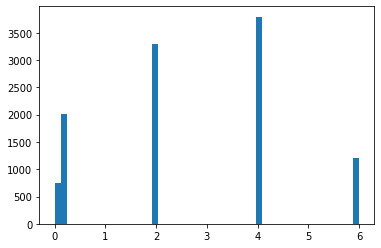

In [11]:
ax = plt.hist(df_whole.day, bins = 50)

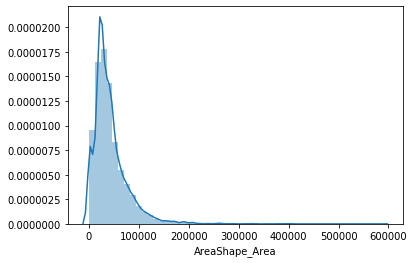

In [12]:
ax = sns.distplot(df_whole.AreaShape_Area)

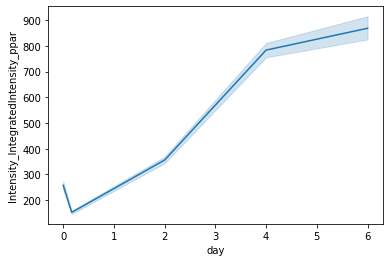

In [14]:
ax = sns.lineplot(df_whole.day, df_whole.Intensity_IntegratedIntensity_ppar)

(-100, 2500)

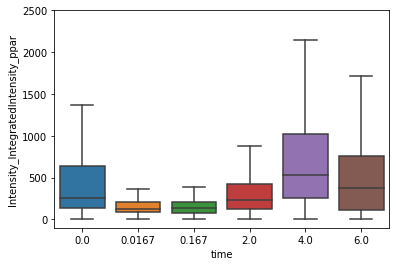

In [36]:
ax = sns.boxplot(df_whole.time, df_whole.Intensity_IntegratedIntensity_ppar, fliersize = 0)
plt.ylim(-100, 2500)

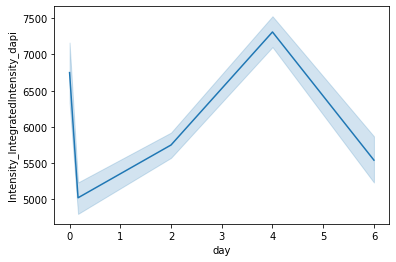

In [16]:
ax = sns.lineplot(df_whole.day, df_whole.Intensity_IntegratedIntensity_dapi)

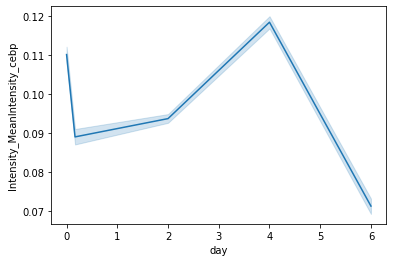

In [18]:
ax = sns.lineplot(df_whole.day,df_whole.Intensity_MeanIntensity_cebp)

### I am using the random tree classifier that I developed a based on the smaller images. I tried it out on a little bit of data from the larger images and it appears to perform with a comprable level of precision on those so I think that this is a good strategy to take going forward

In [7]:
'''chane to the directory with the training data'''
os.chdir(r'C:\Users\LegantLab\Documents\git\tad\Legant_lab\200428_adipogenesis_timecourses_revisited\190603_3t3l1_timecourse\version2\8kb_run\annotation_csvs')

In [8]:
df_train_orig = pd.read_csv('annotated_training.csv')

In [9]:
keep_cats = [ 'AreaShape_Area',
 #'AreaShape_Center_X',
 #'AreaShape_Center_Y',
 #'AreaShape_Center_Z',
 'AreaShape_Compactness',
 'AreaShape_Eccentricity',
 'AreaShape_EulerNumber',
 'AreaShape_Extent',
 'AreaShape_FormFactor',
 'AreaShape_MajorAxisLength',
 'AreaShape_MaxFeretDiameter',
 'AreaShape_MaximumRadius',
 'AreaShape_MeanRadius',
 'AreaShape_MedianRadius',
 'AreaShape_MinFeretDiameter',
 'AreaShape_MinorAxisLength',
 'AreaShape_Orientation',
 'AreaShape_Perimeter',
 'AreaShape_Solidity',
 'AreaShape_Zernike_0_0',
 'AreaShape_Zernike_1_1',
 'AreaShape_Zernike_2_0',
 'AreaShape_Zernike_2_2',
 'AreaShape_Zernike_3_1',
 'AreaShape_Zernike_3_3',
 'AreaShape_Zernike_4_0',
 'AreaShape_Zernike_4_2',
 'AreaShape_Zernike_4_4',
 'AreaShape_Zernike_5_1',
 'AreaShape_Zernike_5_3',
 'AreaShape_Zernike_5_5',
 'AreaShape_Zernike_6_0',
 'AreaShape_Zernike_6_2',
 'AreaShape_Zernike_6_4',
 'AreaShape_Zernike_6_6',
 'AreaShape_Zernike_7_1',
 'AreaShape_Zernike_7_3',
 'AreaShape_Zernike_7_5',
 'AreaShape_Zernike_7_7',
 'AreaShape_Zernike_8_0',
 'AreaShape_Zernike_8_2',
 'AreaShape_Zernike_8_4',
 'AreaShape_Zernike_8_6',
 'AreaShape_Zernike_8_8',
 'AreaShape_Zernike_9_1',
 'AreaShape_Zernike_9_3',
 'AreaShape_Zernike_9_5',
 'AreaShape_Zernike_9_7',
 'AreaShape_Zernike_9_9',

 'Intensity_IntegratedIntensityEdge_dapi',

 'Intensity_IntegratedIntensity_dapi',

 'Intensity_LowerQuartileIntensity_dapi',

 'Intensity_MADIntensity_dapi',

 'Intensity_MassDisplacement_dapi',

 'Intensity_MaxIntensityEdge_dapi',

 'Intensity_MaxIntensity_dapi',

 'Intensity_MeanIntensityEdge_dapi',

 'Intensity_MeanIntensity_dapi',

 'Intensity_MedianIntensity_dapi',

 'Intensity_MinIntensityEdge_dapi',

 'Intensity_MinIntensity_dapi',

 'Intensity_StdIntensityEdge_dapi',

 'Intensity_StdIntensity_dapi',

 'Intensity_UpperQuartileIntensity_dapi',
'in_object']

In [12]:
df_whole = df_whole.dropna()

In [13]:
len(df_whole_) / len(df_whole)

NameError: name 'df_whole_' is not defined

In [14]:
for i in list(df_whole):
    print(i, ' : ', np.sum(df_whole[i].isna()))

ImageNumber  :  0
ObjectNumber  :  0
AreaShape_Area  :  0
AreaShape_Center_X  :  0
AreaShape_Center_Y  :  0
AreaShape_Center_Z  :  0
AreaShape_Compactness  :  0
AreaShape_Eccentricity  :  0
AreaShape_EulerNumber  :  0
AreaShape_Extent  :  0
AreaShape_FormFactor  :  0
AreaShape_MajorAxisLength  :  0
AreaShape_MaxFeretDiameter  :  0
AreaShape_MaximumRadius  :  0
AreaShape_MeanRadius  :  0
AreaShape_MedianRadius  :  0
AreaShape_MinFeretDiameter  :  0
AreaShape_MinorAxisLength  :  0
AreaShape_Orientation  :  0
AreaShape_Perimeter  :  0
AreaShape_Solidity  :  0
AreaShape_Zernike_0_0  :  0
AreaShape_Zernike_1_1  :  0
AreaShape_Zernike_2_0  :  0
AreaShape_Zernike_2_2  :  0
AreaShape_Zernike_3_1  :  0
AreaShape_Zernike_3_3  :  0
AreaShape_Zernike_4_0  :  0
AreaShape_Zernike_4_2  :  0
AreaShape_Zernike_4_4  :  0
AreaShape_Zernike_5_1  :  0
AreaShape_Zernike_5_3  :  0
AreaShape_Zernike_5_5  :  0
AreaShape_Zernike_6_0  :  0
AreaShape_Zernike_6_2  :  0
AreaShape_Zernike_6_4  :  0
AreaShape_Zernike

In [15]:

'''read in the training data and drop categories and entries that are of no use'''
df_train = df_train_orig[keep_cats] # make a copy of original df. I am going to alter this a little bit in order to pull out train and test cats
df_train = df_train.dropna()

'''parse out the relavent parameters our of the test data for classificaiton'''

df_ = df_whole[keep_cats[:-1]]


'''this is target category for the training the classifier'''
target_cat_name = 'in_object'

'''remove unwanted categories'''
#unwanted_cat = ['Unnamed: 0']#, 'ImageNumber', 'ObjectNumber']
#df_train.drop(unwanted_cat, axis = 1, inplace = True)

'''define train and target data'''
x_train = df_train.drop('in_object', axis = 1)
y_train = df_train[target_cat_name]

x_test = df_
#y_test = df_whole.[target_cat_name]

#'''split data into train and test sets'''
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 42)

'''this is a feature scaling step. This will standardize all of the data in order to pull everything into the same range'''
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

'''random forest classifier'''
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

df_whole['in_object'] = clf.predict(x_test)

df_parsed = df_whole.loc[df_whole.in_object == 1]


In [16]:
len(df_parsed) / len(df_whole)

0.4280442804428044

In [17]:
len(df_parsed)

4640

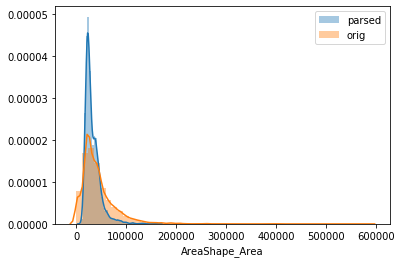

In [18]:
ax = sns.distplot(df_parsed.AreaShape_Area)
ax = sns.distplot(df_whole.AreaShape_Area)
plt.legend(['parsed', 'orig'])

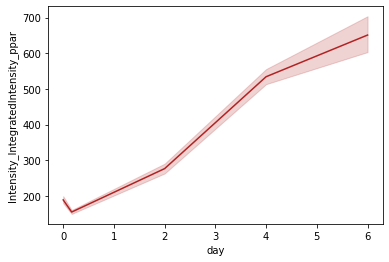

In [20]:
ax = sns.lineplot(df_parsed.day, df_parsed.Intensity_IntegratedIntensity_ppar, color = 'firebrick')

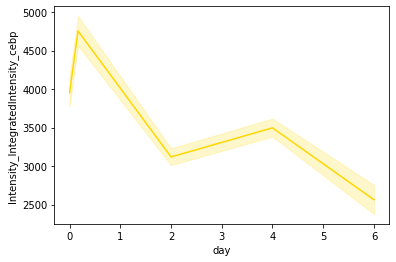

In [21]:
ax = sns.lineplot(df_parsed.day, df_parsed.Intensity_IntegratedIntensity_cebp, color = 'gold')

In [25]:
df = df_parsed.copy()

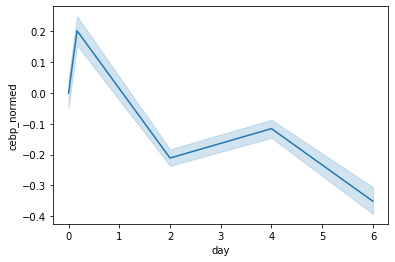

In [27]:
'''start making a category for the noramialized CEBPb expression'''
cebp_normer = np.mean(df.loc[df.day == 0].Intensity_IntegratedIntensity_cebp) # median expression at t= 0
df['cebp_normed'] = np.divide(df.Intensity_IntegratedIntensity_cebp, cebp_normer) - 1 # make a parameter of normalized cebp integrated expression
ax = sns.lineplot(df.day, df.cebp_normed)

In [28]:
for i in np.unique(df.day):
    df_ = df.loc[df.day == i]
    display(len(df_))

413

789

1503

1677

258

### With things looking the way that I they are I think that it might be a better use of my time right now to just push the raw and parsed dfs into .csv files and return to this a little later


In [29]:
os.chdir(r'C:\Users\LegantLab\Documents\git\tad\Legant_lab\200428_adipogenesis_timecourses_revisited\190603_3t3l1_timecourse\version2')

In [30]:
df.to_csv('df_parsed.csv')

In [31]:
'''this is just regeneration of the original dataframe with the added day parameter'''

'''read in the data sets'''
df_t0 = pd.read_csv('MyExpt_t0_nuclei.csv')
df_tp167 = pd.read_csv('MyExpt_t4h_nuclei.csv')
df_t2d = pd.read_csv('MyExpt_t2d_nuclei.csv')
df_t4d = pd.read_csv('MyExpt_t4d_nuclei.csv')
df_t6d = pd.read_csv('MyExpt_t6d_nuclei.csv')


'''make one big data frame from the individual dataframes'''

df_indy_times_lst = [df_t0, df_tp167, df_t2d, df_t4d, df_t6d] #list of dfs over which to iterate
times_lst = [0, .167, 2, 4, 6] #associated time. Lines up with the df_indy_times_lst

df_lst_4_concat = [] #empty list to be populated with dfs that have time parameter added to them

for i in range(len(df_indy_times_lst)): #iterate over the individual dataframes and add the approprieate time
    df_ = df_indy_times_lst[i]
    time_ = times_lst[i]
    
    df_['day'] = np.zeros(len(df_))
    df_['day'] += time_
    
    df_lst_4_concat.append(df_)
    
df_whole = pd.concat(df_lst_4_concat)

In [32]:
df_whole.to_csv('df_raw.csv')